In [8]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import pickle

In [9]:
# Network Architecture
ILS = 1 #Input layer size
NL, LS = 5, 10 # Number of hidden layers and their size

# Initialize weights
def init_w(ils=ILS, nl=NL, ls=LS):
    nu = [ils] + [ls] * nl
    w = []
    for l in range(nl):
        w.append([])
        for i in range(nu[l]):
            w[l].append([])
            for j in range(nu[l+1]):
                w[l][i].append(2*(np.random.uniform()-.5)**1)
    w.append([[(2*(np.random.uniform()-.5))**1 for i in range(nu[nl])]])

        
    return w

# Import weights
def import_w(file):
    with open(file, 'rb') as f:
        w = pickle.load(f)
    return w
    
# Compute output
def compute_output(invals, w, activation_fun):
    # Input layer
    cl = np.array(invals)
    # Hidden layers
    for l in range(len(w)-1):
        #print(len(w[l][0]))
        cl = np.array([np.sum([w[l][i][j]*cl[i] for i in range(len(cl))]) for j in range(len(w[l][0]))])
        if activation_fun=='tanh':
            cl = np.tanh(cl)
        elif activation_fun=='ReLU':
            cl=[cl_i if cl_i>0 else 0 for cl_i in cl]
        elif activation_fun=='leaky_ReLU':
            cl=[cl_i if cl_i>0 else 0.01*cl_i for cl_i in cl]
            
        
    return(np.sum([w[-1][i][0] * cl[i] for i in range(len(w[-1]))]))

In [12]:
NREP = 10
d_all = pd.DataFrame({'x1' : [], 'y': [], 'rep': []})
d_all_raw = pd.DataFrame({'x1' : [], 'y_raw': [], 'rep': []})

activation_function='tanh'


#load pickle with NN weights
filename = 'NN_weights_' + activation_function + '_NREP_10_.pickle'
weights = import_w('../data/backup/' + filename)

    
for rep in range(NREP):
        #load pickle
    w=weights[rep]
    print(len(w))
    for element in w:
        print(len(element))
        for small_weights in element:
            print(small_weights)
            print("\n")

    step=0.01
    x1 = np.arange(-4, 4, step)
    
    x1s, ys = [], []
    
    y = [compute_output([1, thisx1], w, activation_function) for thisx1 in x1]

    x1s=x1
    ys=y
    
    # Normalize y to [0, 1]
    ys = np.array(ys)
    
    ys_norm = (ys - min(ys)) / (max(ys) - min(ys) + 1e-15)

    d = pd.DataFrame({'x1' : x1s, 'y' : ys_norm, 'rep': rep})
    d_all=pd.concat([d_all,d])
    
    #Save non-normalized version
    d_raw = pd.DataFrame({'x1' : x1s, 'y_raw' : ys, 'rep': rep})
    d_all_raw=pd.concat([d_all_raw,d_raw])

save=True
if save==True:
    #with open('../Data/' + 'NN_weights_' + activation_function + '_NREP_' + str(NREP) + '_' + '.pickle', 'wb') as f:
    #    pickle.dump(weights, f, protocol=None)

    d_all.to_csv('../data/backup/' + 'NN_function_' + activation_function + '_NREP_' + str(NREP) + '_res_' + str(step) + '_data.csv')
    d_all_raw.to_csv('../data/backup/' + 'Non_normalized_NN_function_' + activation_function + '_NREP_' + str(NREP) + '_res_' + str(step) + '_data.csv')

6
2
[0.08143414233567925, 0.9329386770497914, -0.5492895516982879, 0.030061379144195932, 0.592374002316324, 0.001415549921052195, 0.5620131374410304, -0.925720588715663, -0.9772250643839826, -0.4491744275914009]


[-0.2370884195932743, 0.27405234961153724, 0.3257370605388614, 0.783856851990506, 0.5702924662919404, -0.7889088336508407, -0.046854599085350834, 0.7954287347657649, 0.6174146592242058, -0.7001493566903023]


10
[0.04092731577906483, 0.4440174330428075, 0.2579790294127393, 0.41140569275534333, 0.8460433046659077, 0.2220934858640966, 0.7081909571555574, -0.6921983417387003, 0.5462922117038636, 0.38053194336540974]


[-0.5442072872916637, -0.2974424795272368, 0.8166194866550667, 0.3306644204136471, 0.7052584253537442, -0.3216801895602286, 0.4620094064628162, 0.3622556464286599, 0.6604948960078736, -0.493357286645175]


[-0.4408400279841598, 0.6637051345217582, -0.47755840586380294, -0.9626950202466342, 0.5995711622391362, 0.6445106339785325, -0.7818249731501095, -0.249110385270

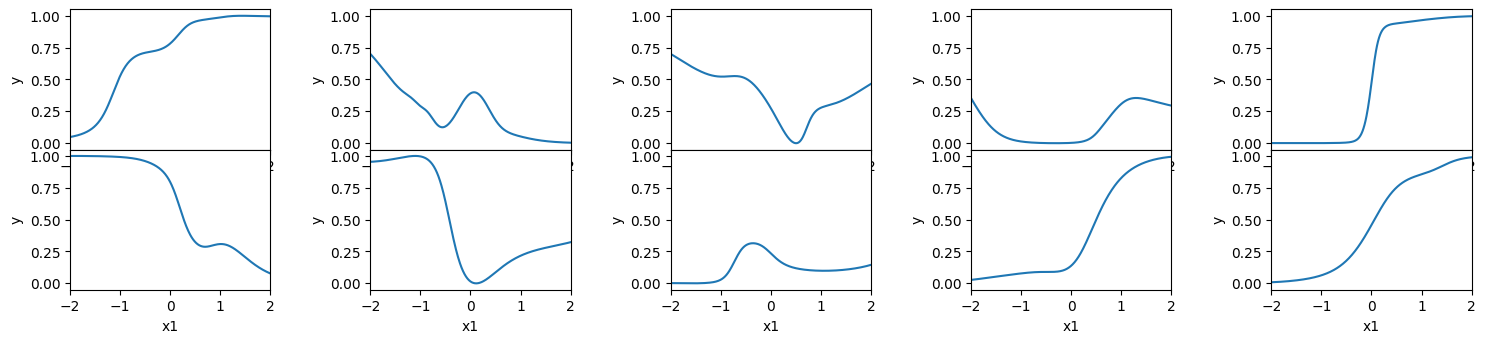

In [16]:
#PLOT -2,2

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches                                                                                                                                                                        
width=40*cm;height=8*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]

rows=2;cols=5
gs=gridspec.GridSpec(rows,cols)
gs.update(left=0.1,right=0.99,bottom=0.08,top=0.97,wspace=0.5,hspace=0.0)

#Plot train rank (-2,2)
h=0
for r in range(rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        d=d_all[d_all['rep']==h]
        ax_rc=sns.lineplot(data=d, x='x1', y='y')
        ax_rc.set_xlim(-2,2)
        h+=1
plt.savefig('../results/seminal_data/' + 'NN_function_high_res_step' +str(step) + activation_function + 'ILS%d_NL%d_LS%d'  %(ILS, NL,  LS) + '.png', dpi=300)


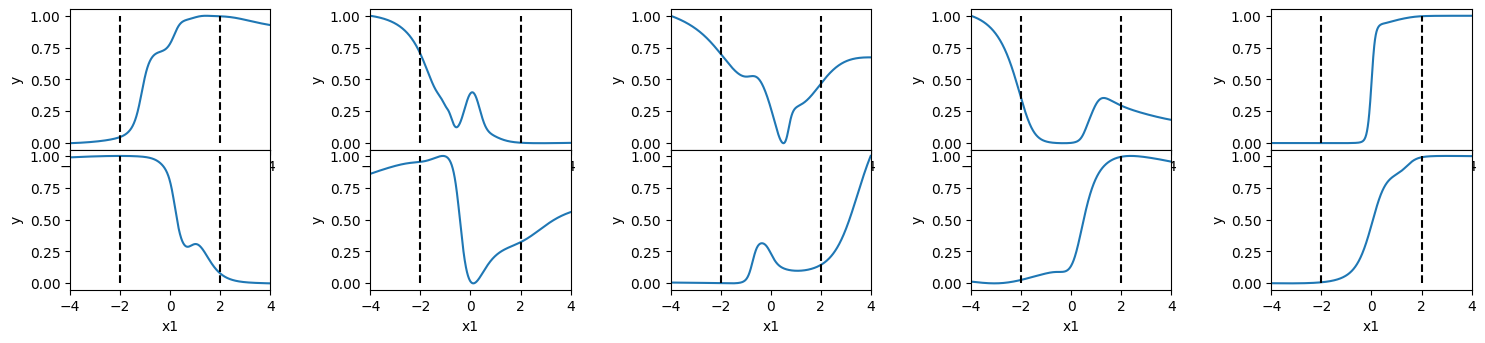

In [17]:
#PLOT FULL RANK (-4,4)

#Figure Size                                                                                                                                                                                                
cm = 1/2.54  # centimeters in inches                                                                                                                                                                        
width=40*cm;height=8*cm #Width and height of plots 
matplotlib.rcParams['figure.figsize'] = [width, height]


h=0
for r in range(rows):
    for c in range(cols):
        ax_rc=plt.subplot(gs[r,c])
        d=d_all[d_all['rep']==h]
        ax_rc=sns.lineplot(data=d, x='x1', y='y')
        ax_rc.vlines(x=[-2, 2], ymin=0, ymax=1, color='k',linestyle='--')
        ax_rc.set_xlim(-4,4)
        h+=1
plt.savefig('../results/seminal_data/' + 'NN_function_high_res_step_' +str(step) + activation_function + 'ILS%d_NL%d_LS%d_full_rank'  %(ILS, NL,  LS) + '.png', dpi=300)